# Data Preparation

## Import Libraries

#Banking Marketing Models - Not much regulatory issues
#Risk Modeling - There is potential for regulatory scrutiny
#CCAR or IFRS or Any Capital Adequacy Risk Team - Life is all about answering questions to regulators

In [1]:
import numpy as np
import pandas as pd

## Import Data
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1
We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.
PD - Probability of Default
EAD - Exposure at Default
LGD - Loss Given Default

In [2]:
loan_data_backup = pd.read_csv(r'C:\Users\Admin\Downloads\34_1110834_bundle_archive/loan.csv')

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_data = loan_data_backup.copy()
loan_data['recoveries'].std()
loan_data_backup.shape

(2260668, 145)

## Explore Data

In [4]:
loan_data.dtypes
dtyp_df=pd.DataFrame(loan_data.dtypes)

In [5]:
missing_df=pd.DataFrame(loan_data.isnull().sum()/loan_data.count()) 

In [ ]:
#mean_df['mean_val']=pd.DataFrame(loan_data.mean())

In [ ]:
loan_data_missing_treatment = pd.concat([dtyp_df, missing_df], axis = 1)
loan_data_missing_treatment.to_csv('C:/Users/aksin52/Documents/My Webinars/Credit Risk Datasets and Projects/Lending Data and Project/loan_data_missing.csv')
loan_data_missing_treatment.head()

In [5]:
loan_data['mths_since_last_record'].fillna(loan_data['mths_since_last_record'].mean(),inplace=True)
loan_data['mths_since_last_major_derog'].fillna(loan_data['mths_since_last_major_derog'].mean(),inplace=True)
loan_data['mths_since_last_delinq'].fillna(loan_data['mths_since_last_delinq'].mean(),inplace=True)
loan_data['tot_coll_amt'].fillna(loan_data['tot_coll_amt'].mean(),inplace=True)
loan_data['tot_cur_bal'].fillna(loan_data['tot_cur_bal'].mean(),inplace=True)
loan_data['total_rev_hi_lim'].fillna(loan_data['total_rev_hi_lim'].mean(),inplace=True)
loan_data['revol_util'].fillna(loan_data['revol_util'].mean(),inplace=True)
loan_data['collections_12_mths_ex_med'].fillna(loan_data['collections_12_mths_ex_med'].mean(),inplace=True)
loan_data['delinq_2yrs'].fillna(loan_data['delinq_2yrs'].mean(),inplace=True)
loan_data['inq_last_6mths'].fillna(loan_data['inq_last_6mths'].mean(),inplace=True)
loan_data['open_acc'].fillna(loan_data['open_acc'].mean(),inplace=True)
loan_data['pub_rec'].fillna(loan_data['pub_rec'].mean(),inplace=True)
loan_data['total_acc'].fillna(loan_data['total_acc'].mean(),inplace=True)
loan_data['acc_now_delinq'].fillna(loan_data['acc_now_delinq'].mean(),inplace=True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(),inplace=True)

In [6]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


In [ ]:
loan_data1.columns.values
# Displays all column names.

In [ ]:
loan_data1.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

## General Preprocessing

### Preprocessing few continuous variables

In [8]:
loan_data['emp_length'].unique()
# Displays unique values of a column.

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
# We store the preprocessed ‘employment length’ variable in a new variable called ‘employment length int’,
# We assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’
# replaced with nothing. Next, we replace the whole string ‘less than 1 year’ with the string ‘0’.
# Then, we replace the ‘n/a’ string with the string ‘0’. Then, we replace the string ‘space years’ with nothing.
# Finally, we replace the string ‘space year’ with nothing.

In [10]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

str

In [11]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
loan_data['emp_length_int'].value_counts()
# Transforms the values to numeric.
loan_data['emp_length_int'].fillna(0, inplace=True)

In [12]:
type(loan_data['emp_length_int'][0])
# Checks the datatype of a single element of a column.

numpy.float64

In [13]:
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,32068.620045,NaN,NaN,NaN,10.0
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,32068.620045,NaN,NaN,NaN,0.0
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,32068.620045,NaN,NaN,NaN,10.0
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,32068.620045,NaN,NaN,NaN,10.0
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,32068.620045,NaN,NaN,NaN,1.0
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,32068.620045,NaN,NaN,NaN,3.0
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,32068.620045,NaN,NaN,NaN,8.0
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,32068.620045,NaN,NaN,NaN,9.0
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,32068.620045,NaN,NaN,NaN,4.0
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,32068.620045,NaN,NaN,NaN,0.0


In [14]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
5          36 months
6          60 months
7          36 months
8          60 months
9          60 months
10         60 months
11         36 months
12         36 months
13         36 months
14         36 months
15         36 months
16         36 months
17         36 months
18         36 months
19         36 months
20         60 months
21         36 months
22         36 months
23         36 months
24         36 months
25         36 months
26         36 months
27         60 months
28         36 months
29         36 months
             ...    
887349     36 months
887350     60 months
887351     36 months
887352     36 months
887353     60 months
887354     36 months
887355     36 months
887356     60 months
887357     60 months
887358     60 months
887359     60 months
887360     60 months
887361     36 months
887362     36 months
887363     36 months
887364     36 months
887365     36

In [15]:
loan_data['term'].describe()
# Shows some descriptive statisics for the values of a column.

count         887379
unique             2
top        36 months
freq          621125
Name: term, dtype: object

In [16]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
# We replace a string with another string, in this case, with an empty strng (i.e. with nothing).

In [17]:
loan_data['term_int']

0          36
1          60
2          36
3          36
4          60
5          36
6          60
7          36
8          60
9          60
10         60
11         36
12         36
13         36
14         36
15         36
16         36
17         36
18         36
19         36
20         60
21         36
22         36
23         36
24         36
25         36
26         36
27         60
28         36
29         36
         ... 
887349     36
887350     60
887351     36
887352     36
887353     60
887354     36
887355     36
887356     60
887357     60
887358     60
887359     60
887360     60
887361     36
887362     36
887363     36
887364     36
887365     36
887366     36
887367     36
887368     60
887369     36
887370     36
887371     36
887372     36
887373     36
887374     36
887375     36
887376     60
887377     60
887378     36
Name: term_int, Length: 887379, dtype: object

In [18]:
type(loan_data['term_int'][25])
# Checks the datatype of a single element of a column.

str

In [19]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data['term'].fillna(0, inplace=True)
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
5         36
6         60
7         36
8         60
9         60
10        60
11        36
12        36
13        36
14        36
15        36
16        36
17        36
18        36
19        36
20        60
21        36
22        36
23        36
24        36
25        36
26        36
27        60
28        36
29        36
          ..
887349    36
887350    60
887351    36
887352    36
887353    60
887354    36
887355    36
887356    60
887357    60
887358    60
887359    60
887360    60
887361    36
887362    36
887363    36
887364    36
887365    36
887366    36
887367    36
887368    60
887369    36
887370    36
887371    36
887372    36
887373    36
887374    36
887375    36
887376    60
887377    60
887378    36
Name: term_int, Length: 887379, dtype: int64

In [20]:
type(loan_data['term_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

In [21]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 76 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887379 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

We are going to preprocess the following discrete variables: grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status. Most likely, we are not going to use sub_grade, as it overlaps with grade.

In [22]:
pd.get_dummies(loan_data['grade'])
# Create dummy variables from a variable.

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0
9,0,1,0,0,0,0,0


In [23]:
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')
# Create dummy variables from a variable.

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0
9,0,1,0,0,0,0,0


In [24]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]
# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [25]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
# We concatenate the dummy variables and this turns them into a dataframe.

In [26]:
type(loan_data_dummies)
# Returns the type of the variable.

pandas.core.frame.DataFrame

In [29]:
#Dropping variables that had more than 40% of Missing Values
loan_data1=loan_data.drop(['dti_joint','emp_length',
'annual_inc_joint',
'il_util',
'mths_since_rcnt_il',
'open_acc_6m',
'open_il_6m',
'open_il_12m',
'open_il_24m',
'total_bal_il',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'emp_title',
'desc',
'title',
'earliest_cr_line',
'last_pymnt_d',
'next_pymnt_d',
'last_credit_pull_d',
'verification_status_joint'],axis='columns')

In [30]:
loan_data1 = pd.concat([loan_data1, loan_data_dummies], axis = 1)
# Concatenates two dataframes.
# Here we concatenate the dataframe with original data with the dataframe with dummy variables, along the columns. 

In [31]:
loan_data1.columns.values
# Displays all column names.

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'emp_length_int', 'term_int', 'grade:A',
       'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
 

In [32]:
loan_data1.std()

id                             2.282734e+07
member_id                      2.411335e+07
loan_amnt                      8.435456e+03
funded_amnt                    8.429898e+03
funded_amnt_inv                8.442107e+03
int_rate                       4.381867e+00
installment                    2.441866e+02
annual_inc                     6.469815e+04
dti                            1.719063e+01
delinq_2yrs                    8.622298e-01
inq_last_6mths                 9.984314e-01
mths_since_last_delinq         1.528861e+01
mths_since_last_record         1.105416e+01
open_acc                       5.317226e+00
pub_rec                        5.820812e-01
revol_bal                      2.242679e+04
revol_util                     2.382760e+01
total_acc                      1.184037e+01
out_prncp                      8.493450e+03
out_prncp_inv                  8.489998e+03
total_pymnt                    7.871243e+03
total_pymnt_inv                7.846109e+03
total_rec_prncp                6

In [33]:
loan_data1.isnull().sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
pymnt_plan                0
url                       0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
mths_since_last_delinq    0
mths_since_last_record    0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
                         ..
addr_state:MN             0
addr_state:MO             0
addr_state:MS             0
addr_state:MT             0
addr_state:NC       

# PD model

## Data preparation

### Dependent Variable. Good/ Bad (Default) Definition. Default and Non-default Accounts.

In [34]:
loan_data1['loan_status'].unique()
# Displays unique values of a column.

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [35]:
loan_data1['loan_status'].value_counts()
# Calculates the number of observations for each unique value of a variable.

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [36]:
loan_data1['loan_status'].value_counts() / loan_data1['loan_status'].count()
# We divide the number of observations for each unique value of a variable by the total number of observations.
# Thus, we get the proportion of observations for each unique value of a variable.

Current                                                0.678153
Fully Paid                                             0.234086
Charged Off                                            0.050991
Late (31-120 days)                                     0.013062
Issued                                                 0.009534
In Grace Period                                        0.007047
Late (16-30 days)                                      0.002656
Does not meet the credit policy. Status:Fully Paid     0.002240
Default                                                0.001374
Does not meet the credit policy. Status:Charged Off    0.000858
Name: loan_status, dtype: float64

In [37]:
# Good/ Bad Definition
loan_data1['good_bad'] = np.where(loan_data1['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

In [38]:
loan_data1['good_bad'].mean()

0.9337160333972294

In [39]:
loan_data1['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

### Splitting Data

In [143]:
from sklearn.model_selection import train_test_split
# Imports the libraries we need.

In [144]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data1.drop('good_bad', axis = 1), loan_data1['good_bad'], test_size = 0.2, random_state = 42)
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# This time we set the size of the test dataset to be 20%.
# Respectively, the size of the train dataset becomes 80%.
# We also set a specific random state.
# This would allow us to perform the exact same split multimple times.
# This means, to assign the exact same observations to the train and test datasets.

In [145]:
loan_data_inputs_train.shape
# Displays the size of the dataframe.

(709903, 179)

In [146]:
loan_data_targets_train.shape
# Displays the size of the dataframe.

(709903,)

In [147]:
loan_data_inputs_test.shape
# Displays the size of the dataframe.

(177476, 179)

In [148]:
loan_data_targets_test.shape
# Displays the size of the dataframe.

(177476,)

### Data Preparation: An Example

In [252]:
loan_data_target=loan_data1['good_bad']
loan_data_inputs=loan_data1.drop(['good_bad'],axis=1)

In [254]:
#####
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
#####
df_inputs_prepr = loan_data_inputs
df_targets_prepr = loan_data_target

In [255]:
df_inputs_prepr['grade'].unique()
# Displays unique values of a column.

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [256]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
# Concatenates two dataframes along the columns.
df1.head()

,grade,good_bad
0,B,1
1,C,0
2,C,1
3,C,1
4,B,1


In [257]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# In this specific case, we group by the column with index 0 and we aggregate the values of the column with index 1.
# More specifically, we count them.
# In other words, we count the values in the column with index 1 for each value of the column with index 0.

,grade,good_bad
0,A,148202
1,B,254535
2,C,245860
3,D,139542
4,E,70705
5,F,23046
6,G,5489


In [258]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()
# Groups the data according to a criterion contained in one column.
# Does not turn the names of the values of the criterion as indexes.
# Aggregates the data in another column, using a selected function.
# Here we calculate the mean of the values in the column with index 1 for each value of the column with index 0.

,grade,good_bad
0,A,0.978651
1,B,0.953617
2,C,0.932933
3,D,0.900496
4,E,0.880221
5,F,0.831901
6,G,0.793769


In [259]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
# Concatenates two dataframes along the columns.

In [260]:
df1

,grade,good_bad,grade,good_bad
0,A,148202,A,0.978651
1,B,254535,B,0.953617
2,C,245860,C,0.932933
3,D,139542,D,0.900496
4,E,70705,E,0.880221
5,F,23046,F,0.831901
6,G,5489,G,0.793769


In [261]:
df1 = df1.iloc[:, [0, 1, 3]]
# Selects only columns with specific indexes.
df1

,grade,good_bad,good_bad
0,A,148202,0.978651
1,B,254535,0.953617
2,C,245860,0.932933
3,D,139542,0.900496
4,E,70705,0.880221
5,F,23046,0.831901
6,G,5489,0.793769


In [262]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
# Changes the names of the columns of a dataframe.
df1

,grade,n_obs,prop_good
0,A,148202,0.978651
1,B,254535,0.953617
2,C,245860,0.932933
3,D,139542,0.900496
4,E,70705,0.880221
5,F,23046,0.831901
6,G,5489,0.793769


In [263]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
# We divide the values of one column by he values of another column and save the result in a new variable.
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,148202,0.978651,0.167011
1,B,254535,0.953617,0.286839
2,C,245860,0.932933,0.277063
3,D,139542,0.900496,0.157252
4,E,70705,0.880221,0.079678
5,F,23046,0.831901,0.025971
6,G,5489,0.793769,0.006186


In [264]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
# We multiply the values of one column by he values of another column and save the result in a new variable.
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,148202,0.978651,0.167011,145038.0,3164.0
1,B,254535,0.953617,0.286839,242729.0,11806.0
2,C,245860,0.932933,0.277063,229371.0,16489.0
3,D,139542,0.900496,0.157252,125657.0,13885.0
4,E,70705,0.880221,0.079678,62236.0,8469.0
5,F,23046,0.831901,0.025971,19172.0,3874.0
6,G,5489,0.793769,0.006186,4357.0,1132.0


In [265]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,148202,0.978651,0.167011,145038.0,3164.0,0.175048,0.053792
1,B,254535,0.953617,0.286839,242729.0,11806.0,0.292953,0.200717
2,C,245860,0.932933,0.277063,229371.0,16489.0,0.276831,0.280335
3,D,139542,0.900496,0.157252,125657.0,13885.0,0.151657,0.236063
4,E,70705,0.880221,0.079678,62236.0,8469.0,0.075113,0.143984
5,F,23046,0.831901,0.025971,19172.0,3874.0,0.023139,0.065863
6,G,5489,0.793769,0.006186,4357.0,1132.0,0.005259,0.019245


In [266]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
# We take the natural logarithm of a variable and save the result in WoE variable.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,148202,0.978651,0.167011,145038.0,3164.0,0.175048,0.053792,1.179934
1,B,254535,0.953617,0.286839,242729.0,11806.0,0.292953,0.200717,0.378113
2,C,245860,0.932933,0.277063,229371.0,16489.0,0.276831,0.280335,-0.012577
3,D,139542,0.900496,0.157252,125657.0,13885.0,0.151657,0.236063,-0.442477
4,E,70705,0.880221,0.079678,62236.0,8469.0,0.075113,0.143984,-0.650703
5,F,23046,0.831901,0.025971,19172.0,3874.0,0.023139,0.065863,-1.046061
6,G,5489,0.793769,0.006186,4357.0,1132.0,0.005259,0.019245,-1.297427


In [267]:
df1 = df1.sort_values(['WoE'])
# Sorts a dataframe by the values of a given column.
df1 = df1.reset_index(drop = True)
# We reset the index of a dataframe and overwrite it.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,5489,0.793769,0.006186,4357.0,1132.0,0.005259,0.019245,-1.297427
1,F,23046,0.831901,0.025971,19172.0,3874.0,0.023139,0.065863,-1.046061
2,E,70705,0.880221,0.079678,62236.0,8469.0,0.075113,0.143984,-0.650703
3,D,139542,0.900496,0.157252,125657.0,13885.0,0.151657,0.236063,-0.442477
4,C,245860,0.932933,0.277063,229371.0,16489.0,0.276831,0.280335,-0.012577
5,B,254535,0.953617,0.286839,242729.0,11806.0,0.292953,0.200717,0.378113
6,A,148202,0.978651,0.167011,145038.0,3164.0,0.175048,0.053792,1.179934


In [268]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1['diff_WoE'] = df1['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,5489,0.793769,0.006186,4357.0,1132.0,0.005259,0.019245,-1.297427,NaN,NaN
1,F,23046,0.831901,0.025971,19172.0,3874.0,0.023139,0.065863,-1.046061,0.038132,0.251366
2,E,70705,0.880221,0.079678,62236.0,8469.0,0.075113,0.143984,-0.650703,0.048319,0.395358
3,D,139542,0.900496,0.157252,125657.0,13885.0,0.151657,0.236063,-0.442477,0.020275,0.208226
4,C,245860,0.932933,0.277063,229371.0,16489.0,0.276831,0.280335,-0.012577,0.032437,0.429900
5,B,254535,0.953617,0.286839,242729.0,11806.0,0.292953,0.200717,0.378113,0.020684,0.390690
6,A,148202,0.978651,0.167011,145038.0,3164.0,0.175048,0.053792,1.179934,0.025033,0.801821


In [269]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
# We sum all values of a given column.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,5489,0.793769,0.006186,4357.0,1132.0,0.005259,0.019245,-1.297427,NaN,NaN,0.322995
1,F,23046,0.831901,0.025971,19172.0,3874.0,0.023139,0.065863,-1.046061,0.038132,0.251366,0.322995
2,E,70705,0.880221,0.079678,62236.0,8469.0,0.075113,0.143984,-0.650703,0.048319,0.395358,0.322995
3,D,139542,0.900496,0.157252,125657.0,13885.0,0.151657,0.236063,-0.442477,0.020275,0.208226,0.322995
4,C,245860,0.932933,0.277063,229371.0,16489.0,0.276831,0.280335,-0.012577,0.032437,0.429900,0.322995
5,B,254535,0.953617,0.286839,242729.0,11806.0,0.292953,0.200717,0.378113,0.020684,0.390690,0.322995
6,A,148202,0.978651,0.167011,145038.0,3164.0,0.175048,0.053792,1.179934,0.025033,0.801821,0.322995


### Preprocessing Discrete Variables: Automating Calculaions

In [270]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    #df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [271]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,5489,0.793769,0.006186,4357.0,1132.0,0.005259,0.019245,-1.297427,NaN,NaN,0.018147
1,F,23046,0.831901,0.025971,19172.0,3874.0,0.023139,0.065863,-1.046061,0.038132,0.251366,0.044692
2,E,70705,0.880221,0.079678,62236.0,8469.0,0.075113,0.143984,-0.650703,0.048319,0.395358,0.044814
3,D,139542,0.900496,0.157252,125657.0,13885.0,0.151657,0.236063,-0.442477,0.020275,0.208226,0.037348
4,C,245860,0.932933,0.277063,229371.0,16489.0,0.276831,0.280335,-0.012577,0.032437,0.429900,0.000044
5,B,254535,0.953617,0.286839,242729.0,11806.0,0.292953,0.200717,0.378113,0.020684,0.390690,0.034875
6,A,148202,0.978651,0.167011,145038.0,3164.0,0.175048,0.053792,1.179934,0.025033,0.801821,0.143074


### Preprocessing Discrete Variables: Visualizing Results

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
# Imports the libraries we need.
sns.set()
# We set the default style of the graphs to the seaborn style. 

In [273]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

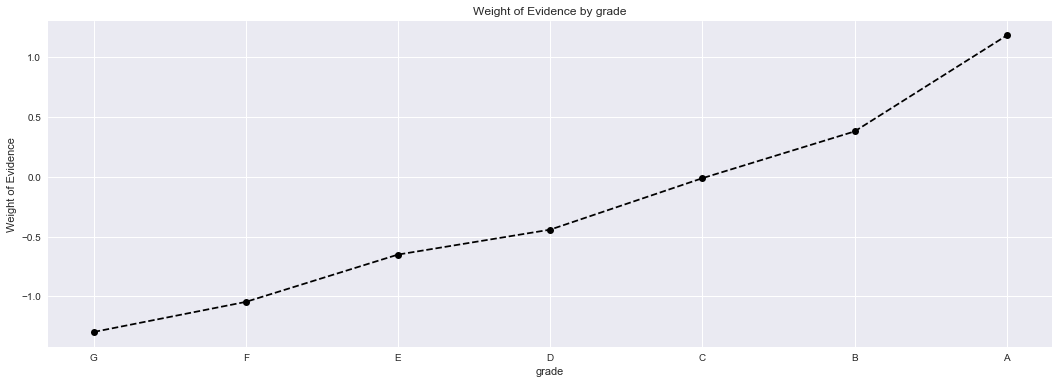

In [274]:
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 1

In [275]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,182,0.791209,0.000205,144.0,38.0,0.000174,0.000646,-1.312997,NaN,NaN,0.000620
1,NONE,50,0.840000,0.000056,42.0,8.0,0.000051,0.000136,-0.986996,0.048791,0.326001,0.000084
2,RENT,356117,0.922402,0.401313,328483.0,27634.0,0.396450,0.469814,-0.169786,0.082402,0.817210,0.012456
3,OWN,87470,0.938310,0.098571,82074.0,5396.0,0.099056,0.091739,0.076739,0.015908,0.246525,0.000562
4,MORTGAGE,443557,0.941962,0.499851,417814.0,25743.0,0.504265,0.437665,0.141649,0.003652,0.064910,0.009434
5,ANY,3,1.000000,0.000003,3.0,0.0,0.000004,0.000000,inf,0.058038,inf,inf


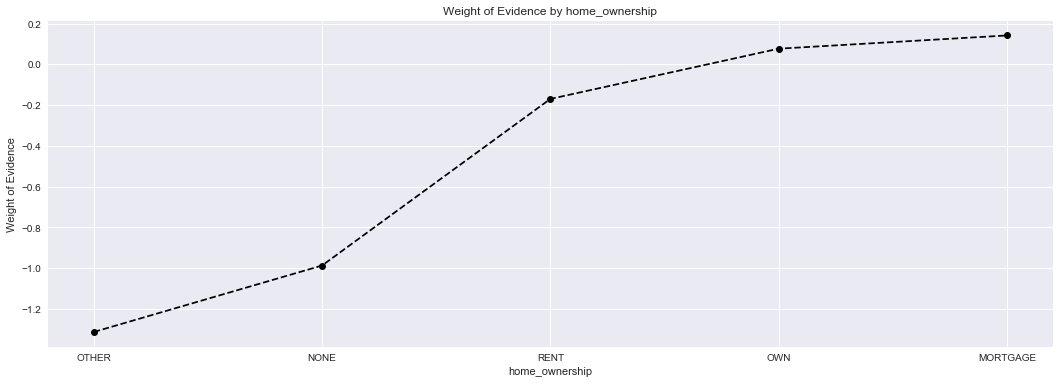

In [276]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [277]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])
# 'RENT_OTHER_NONE_ANY' will be the reference category.

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

### Preprocessing Discrete Variables: Creating Dummy Variables, Part 2

In [278]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object)

In [279]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,IA,14,0.785714,0.000016,11.0,3.0,0.000013,0.000051,-1.345941,NaN,NaN,5.077952e-05
1,NV,12443,0.913847,0.014022,11371.0,1072.0,0.013724,0.018225,-0.283684,0.128133,1.062257,1.277031e-03
2,ID,12,0.916667,0.000014,11.0,1.0,0.000013,0.000017,-0.247329,0.002820,0.036355,9.213660e-07
3,HI,4570,0.919256,0.005150,4201.0,369.0,0.005070,0.006273,-0.212943,0.002589,0.034386,2.562218e-04
4,FL,60935,0.924871,0.068669,56357.0,4578.0,0.068018,0.077832,-0.134780,0.005615,0.078163,1.322730e-03
5,AL,11200,0.925089,0.012621,10361.0,839.0,0.012505,0.014264,-0.131631,0.000219,0.003149,2.315745e-04
6,NY,74086,0.926612,0.083489,68649.0,5437.0,0.082853,0.092436,-0.109445,0.001523,0.022186,1.048784e-03
7,CA,129517,0.928311,0.145955,120232.0,9285.0,0.145110,0.157857,-0.084201,0.001698,0.025244,1.073362e-03
8,SD,1815,0.928375,0.002045,1685.0,130.0,0.002034,0.002210,-0.083238,0.000064,0.000963,1.469328e-05
9,VA,26255,0.928775,0.029587,24385.0,1870.0,0.029431,0.031792,-0.077195,0.000401,0.006043,1.823235e-04


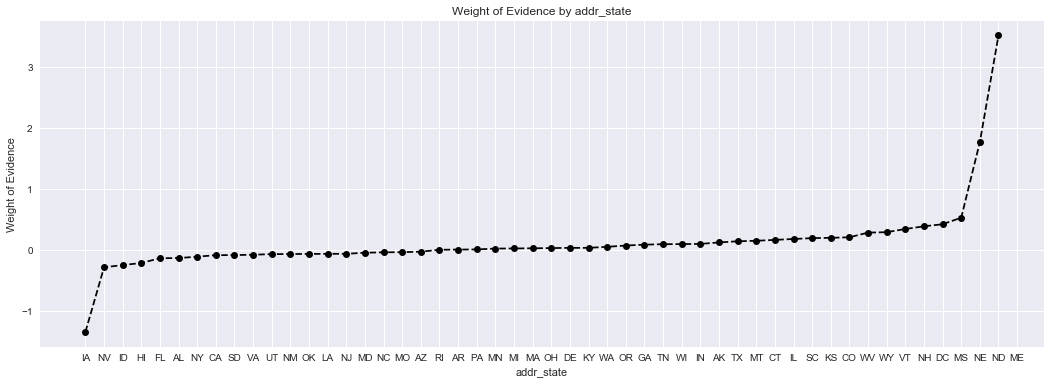

In [280]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [281]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

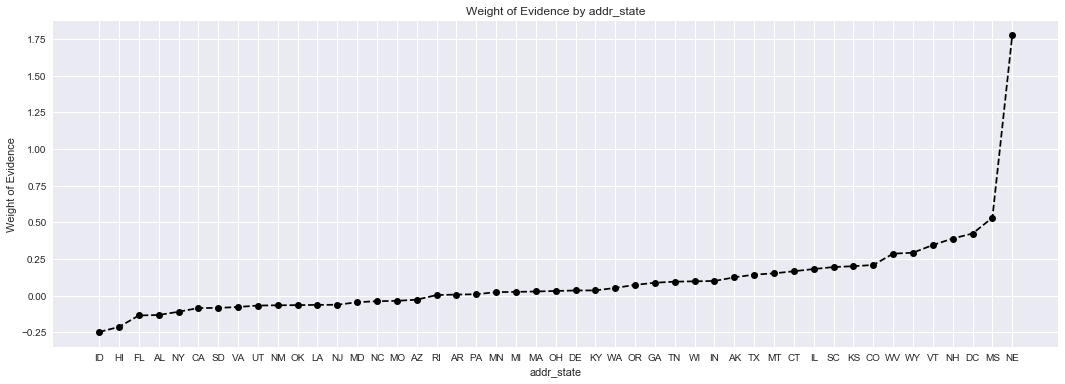

In [282]:
plot_by_woe(df_temp.iloc[2: -2, : ])
# We plot the weight of evidence values.

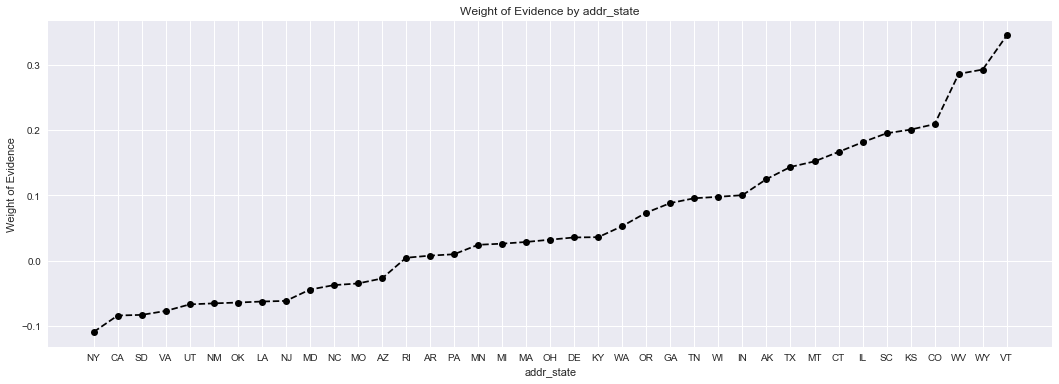

In [283]:
plot_by_woe(df_temp.iloc[6: -6, : ])
# We plot the weight of evidence values.

In [284]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [285]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,291071,0.916543,0.328012,266779.0,24292.0,0.321979,0.412996,-0.248951,NaN,NaN,0.022659
1,Not Verified,266750,0.941826,0.300604,251232.0,15518.0,0.303215,0.263826,0.139152,0.025283,0.388103,0.005481
2,Source Verified,329558,0.942320,0.371384,310549.0,19009.0,0.374806,0.323178,0.148205,0.000494,0.009053,0.007651


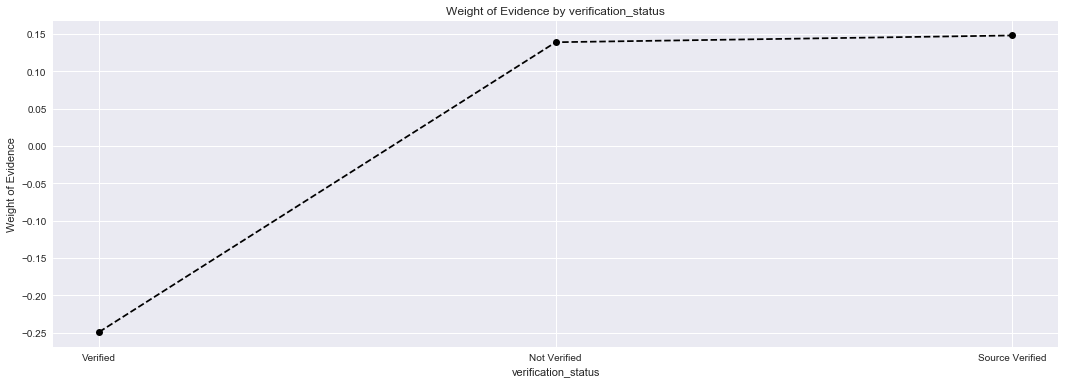

In [286]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [287]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,423,0.791962,0.000477,335.0,88.0,0.000404,0.001496,-1.308431,NaN,NaN,0.001429
1,small_business,10377,0.840802,0.011694,8725.0,1652.0,0.010530,0.028086,-0.981019,0.048840,0.327412,0.017223
2,wedding,2347,0.878142,0.002645,2061.0,286.0,0.002487,0.004862,-0.670270,0.037341,0.310749,0.001592
3,renewable_energy,575,0.888696,0.000648,511.0,64.0,0.000617,0.001088,-0.567738,0.010553,0.102532,0.000268
4,moving,5414,0.900074,0.006101,4873.0,541.0,0.005881,0.009198,-0.447179,0.011378,0.120559,0.001483
5,house,3707,0.901538,0.004177,3342.0,365.0,0.004034,0.006205,-0.430797,0.001464,0.016382,0.000936
6,other,42894,0.913345,0.048338,39177.0,3717.0,0.047283,0.063194,-0.290051,0.011807,0.140746,0.004615
7,medical,8540,0.914403,0.009624,7809.0,731.0,0.009425,0.012428,-0.276606,0.001058,0.013446,0.000831
8,vacation,4736,0.927576,0.005337,4393.0,343.0,0.005302,0.005831,-0.095187,0.013173,0.181418,0.000050
9,debt_consolidation,524215,0.931135,0.590745,488115.0,36100.0,0.589112,0.613747,-0.040966,0.003559,0.054221,0.001009


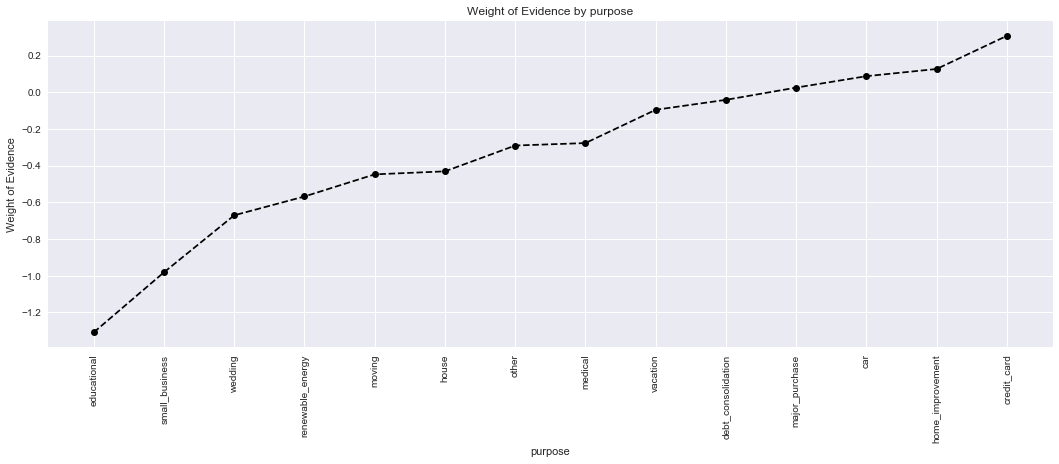

In [288]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [289]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [290]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,456848,0.910962,0.514829,416171.0,40677.0,0.502282,0.691562,-0.319791,NaN,NaN,0.060530
1,w,430531,0.957861,0.485171,412389.0,18142.0,0.497718,0.308438,0.478513,0.0469,0.798304,0.090573


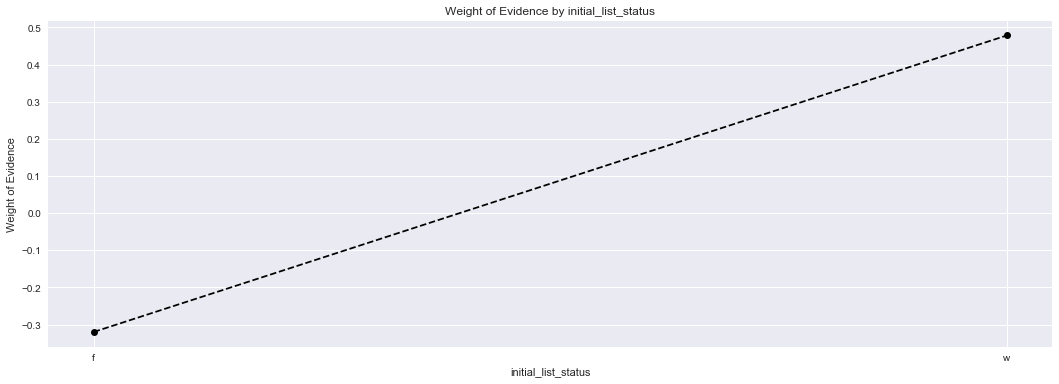

In [291]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [292]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we define a function similar to the one above, ...
# ... with one slight difference: we order the results by the values of a different column.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [293]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([36, 60], dtype=int64)

In [294]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,621125,0.939669,0.699955,583652.0,37473.0,0.704417,0.63709,0.100460,NaN,NaN,0.02058
1,60,266254,0.919828,0.300045,244908.0,21346.0,0.295583,0.36291,-0.205206,0.019841,0.305666,0.02058


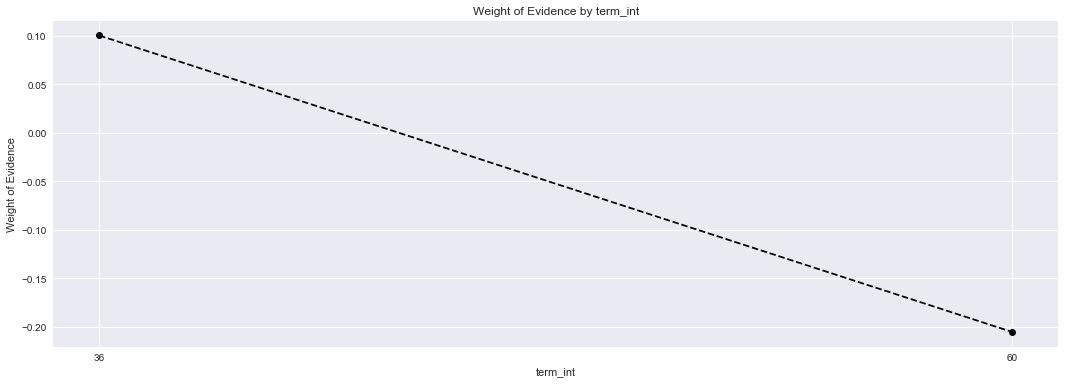

In [295]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [296]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [297]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [298]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,115430,0.927263,0.130080,107034.0,8396.0,0.129181,0.142743,-0.099833,NaN,NaN,0.009714
1,1.0,57095,0.931220,0.064341,53168.0,3927.0,0.064169,0.066764,-0.039643,0.003957,0.060190,0.009714
2,2.0,78870,0.933359,0.088880,73614.0,5256.0,0.088846,0.089359,-0.005759,0.002139,0.033884,0.009714
3,3.0,70026,0.933682,0.078913,65382.0,4644.0,0.078910,0.078954,-0.000553,0.000323,0.005206,0.009714
4,4.0,52529,0.932057,0.059196,48960.0,3569.0,0.059090,0.060678,-0.026506,0.001625,0.025953,0.009714
5,5.0,55704,0.927923,0.062774,51689.0,4015.0,0.062384,0.068260,-0.090017,0.004134,0.063511,0.009714
6,6.0,42950,0.920559,0.048401,39538.0,3412.0,0.047719,0.058008,-0.195261,0.007364,0.105244,0.009714
7,7.0,44594,0.926044,0.050254,41296.0,3298.0,0.049841,0.056070,-0.117775,0.005485,0.077486,0.009714
8,8.0,43955,0.936025,0.049534,41143.0,2812.0,0.049656,0.047808,0.037934,0.009982,0.155708,0.009714
9,9.0,34657,0.933578,0.039055,32355.0,2302.0,0.039050,0.039137,-0.002234,0.002448,0.040168,0.009714


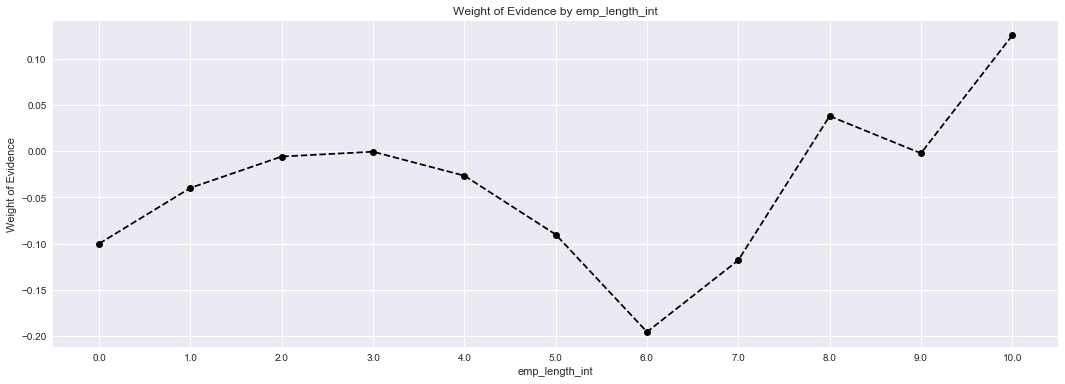

In [299]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [300]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [301]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [302]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.296, 5.793]",10634,0.996333,0.011984,10595.0,39.0,0.012787,0.000663,2.959352,NaN,NaN,0.559545
1,"(5.793, 6.267]",20759,0.988631,0.023394,20523.0,236.0,0.024769,0.004012,1.820245,0.007701,1.139106,0.559545
2,"(6.267, 6.74]",16330,0.980894,0.018403,16018.0,312.0,0.019332,0.005304,1.293241,0.007737,0.527005,0.559545
3,"(6.74, 7.214]",18187,0.989168,0.020495,17990.0,197.0,0.021712,0.003349,1.869143,0.008274,0.575902,0.559545
4,"(7.214, 7.687]",21898,0.979131,0.024677,21441.0,457.0,0.025877,0.007770,1.203153,0.010038,0.665991,0.559545
5,"(7.687, 8.16]",36838,0.977225,0.041513,35999.0,839.0,0.043448,0.014264,1.113811,0.001906,0.089341,0.559545
6,"(8.16, 8.634]",31030,0.986465,0.034968,30610.0,420.0,0.036944,0.007141,1.643603,0.009240,0.529792,0.559545
7,"(8.634, 9.107]",15484,0.947688,0.017449,14674.0,810.0,0.017710,0.013771,0.251574,0.038777,1.392029,0.559545
8,"(9.107, 9.581]",30442,0.985612,0.034306,30004.0,438.0,0.036212,0.007447,1.581643,0.037924,1.330069,0.559545
9,"(9.581, 10.054]",34027,0.972081,0.038346,33077.0,950.0,0.039921,0.016151,0.904907,0.013531,0.676736,0.559545


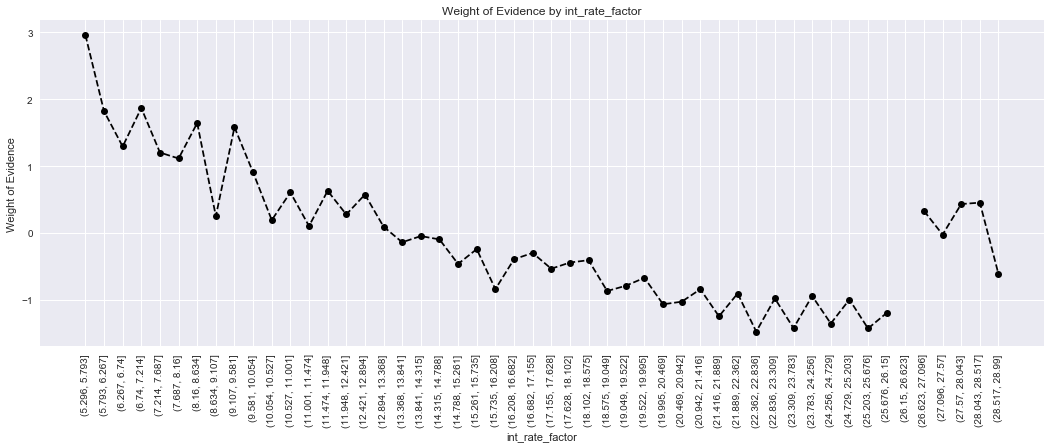

In [303]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [304]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [305]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [306]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",2794,0.937724,0.003149,2620.0,174.0,0.003162,0.002958,0.066650,NaN,NaN,0.018981
1,"(1190.0, 1880.0]",6557,0.935184,0.007389,6132.0,425.0,0.007401,0.007226,0.023963,0.002540,0.042687,0.018981
2,"(1880.0, 2570.0]",13173,0.931527,0.014845,12271.0,902.0,0.014810,0.015335,-0.034845,0.003657,0.058808,0.018981
3,"(2570.0, 3260.0]",15898,0.929614,0.017916,14779.0,1119.0,0.017837,0.019024,-0.064452,0.001913,0.029608,0.018981
4,"(3260.0, 3950.0]",10616,0.931047,0.011963,9884.0,732.0,0.011929,0.012445,-0.042332,0.001434,0.022120,0.018981
5,"(3950.0, 4640.0]",19664,0.928499,0.022160,18258.0,1406.0,0.022036,0.023904,-0.081370,0.002549,0.039038,0.018981
6,"(4640.0, 5330.0]",37547,0.935254,0.042312,35116.0,2431.0,0.042382,0.041330,0.025130,0.006756,0.106500,0.018981
7,"(5330.0, 6020.0]",38822,0.940910,0.043749,36528.0,2294.0,0.044086,0.039001,0.122558,0.005655,0.097428,0.018981
8,"(6020.0, 6710.0]",14573,0.924792,0.016423,13477.0,1096.0,0.016266,0.018633,-0.135907,0.016117,0.258465,0.018981
9,"(6710.0, 7400.0]",26481,0.934821,0.029842,24755.0,1726.0,0.029877,0.029344,0.017997,0.010029,0.153904,0.018981


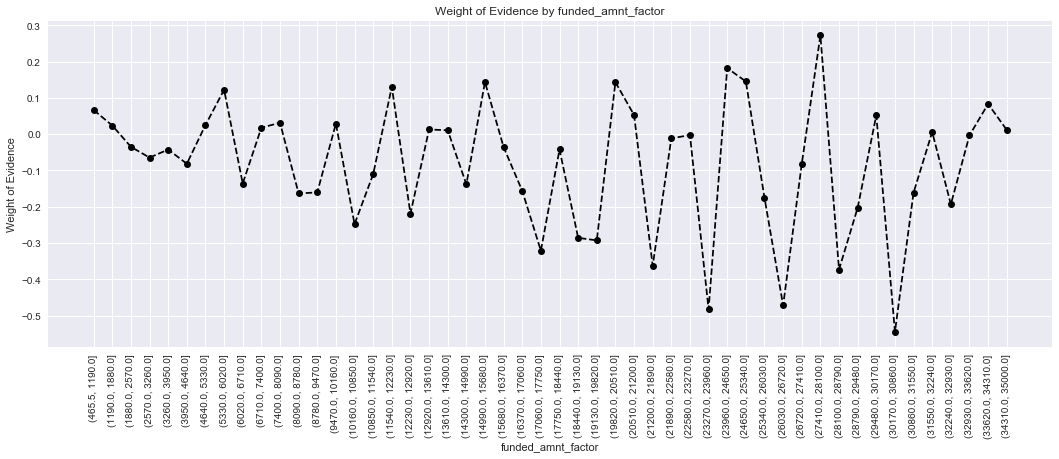

In [307]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Data Preparation: Continuous Variables, Part 1 and 2: Homework

In [308]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\pandas\core\algorithms.py:1820: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.000000,716961,0.933086,0.807954,668986.0,47975.0,0.807408,0.815638,-0.010141,NaN,NaN,inf
1,0.314442,29,0.896552,0.000033,26.0,3.0,0.000031,0.000051,-0.485740,0.036534,0.475599,inf
2,1.000000,113224,0.936763,0.127594,106064.0,7160.0,0.128010,0.121729,0.050308,0.040211,0.536048,inf
3,2.000000,33551,0.934935,0.037809,31368.0,2183.0,0.037858,0.037114,0.019864,0.001828,0.030445,inf
4,3.000000,11977,0.933372,0.013497,11179.0,798.0,0.013492,0.013567,-0.005541,0.001563,0.025404,inf
5,4.000000,5327,0.940492,0.006003,5010.0,317.0,0.006047,0.005389,0.115065,0.007120,0.120606,inf
6,5.000000,2711,0.937293,0.003055,2541.0,170.0,0.003067,0.002890,0.059290,0.003199,0.055775,inf
7,6.000000,1471,0.943576,0.001658,1388.0,83.0,0.001675,0.001411,0.171554,0.006283,0.112264,inf
8,7.000000,784,0.934949,0.000884,733.0,51.0,0.000885,0.000867,0.020096,0.008627,0.151458,inf
9,8.000000,461,0.952278,0.000520,439.0,22.0,0.000530,0.000374,0.348233,0.017329,0.328137,inf


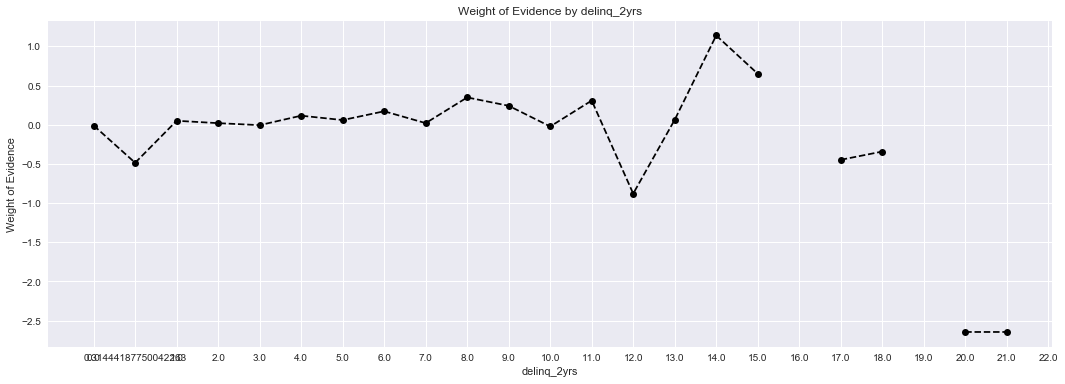

In [309]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [310]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [311]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Anaconda_Python\lib\site-packages\pandas\core\algorithms.py:1820: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.000000,497905,0.947914,0.561096,471971.0,25934.0,0.569628,0.440912,0.256138,NaN,NaN,inf
1,0.694623,29,0.896552,0.000033,26.0,3.0,0.000031,0.000051,-0.485740,0.051362,0.741878,inf
2,1.000000,241494,0.927841,0.272143,224068.0,17426.0,0.270431,0.296265,-0.091238,0.031289,0.394502,inf
3,2.000000,94117,0.905957,0.106062,85266.0,8851.0,0.102909,0.150479,-0.379979,0.021883,0.288741,inf
4,3.000000,37398,0.881571,0.042144,32969.0,4429.0,0.039791,0.075299,-0.637830,0.024386,0.257851,inf
5,4.000000,10758,0.885945,0.012123,9531.0,1227.0,0.011503,0.020861,-0.595247,0.004374,0.042584,inf
6,5.000000,3985,0.867754,0.004491,3458.0,527.0,0.004174,0.008960,-0.763979,0.018191,0.168732,inf
7,6.000000,1231,0.789602,0.001387,972.0,259.0,0.001173,0.004403,-1.322697,0.078152,0.558717,inf
8,7.000000,195,0.651282,0.000220,127.0,68.0,0.000153,0.001156,-2.020545,0.138320,0.697848,inf
9,8.000000,122,0.622951,0.000137,76.0,46.0,0.000092,0.000782,-2.143132,0.028331,0.122587,inf


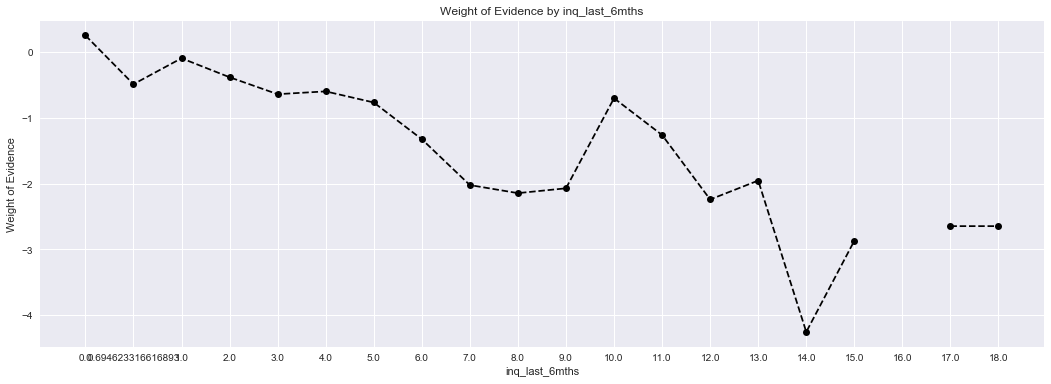

In [312]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [313]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [314]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Anaconda_Python\lib\site-packages\pandas\core\algorithms.py:1820: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.000000,7,0.428571,0.000008,3.0,4.0,0.000004,0.000068,-2.932906,NaN,NaN,inf
1,1.000000,232,0.918103,0.000261,213.0,19.0,0.000257,0.000323,-0.228371,0.489532,2.704535,inf
2,2.000000,2776,0.889769,0.003128,2470.0,306.0,0.002981,0.005202,-0.556836,0.028334,0.328465,inf
3,3.000000,9619,0.918703,0.010840,8837.0,782.0,0.010665,0.013295,-0.220376,0.028933,0.336460,inf
4,4.000000,23367,0.931913,0.026333,21776.0,1591.0,0.026282,0.027049,-0.028779,0.013210,0.191598,inf
5,5.000000,39766,0.932279,0.044813,37073.0,2693.0,0.044744,0.045785,-0.022991,0.000366,0.005787,inf
6,6.000000,55954,0.931748,0.063055,52135.0,3819.0,0.062922,0.064928,-0.031376,0.000531,0.008385,inf
7,7.000000,67896,0.931071,0.076513,63216.0,4680.0,0.076296,0.079566,-0.041965,0.000676,0.010589,inf
8,8.000000,76578,0.931991,0.086297,71370.0,5208.0,0.086137,0.088543,-0.027543,0.000920,0.014422,inf
9,9.000000,80285,0.930921,0.090474,74739.0,5546.0,0.090203,0.094289,-0.044299,0.001070,0.016757,inf


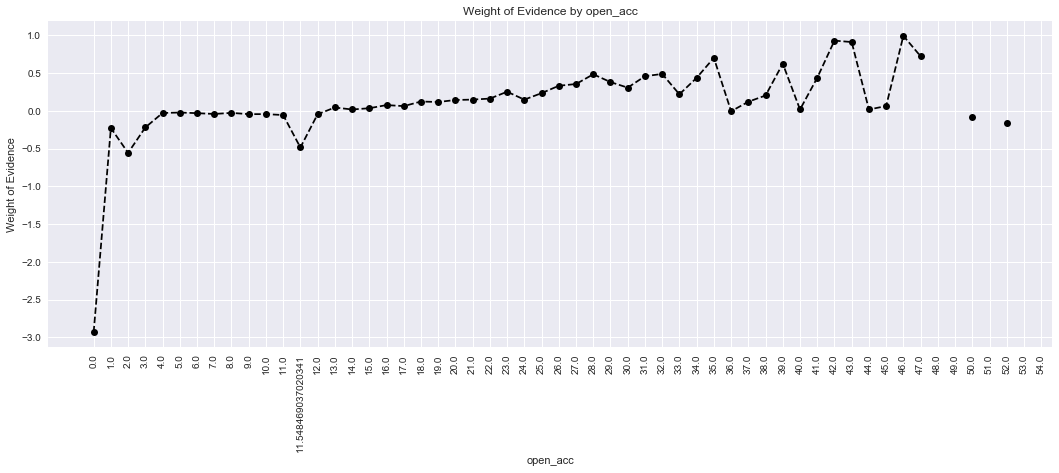

In [315]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

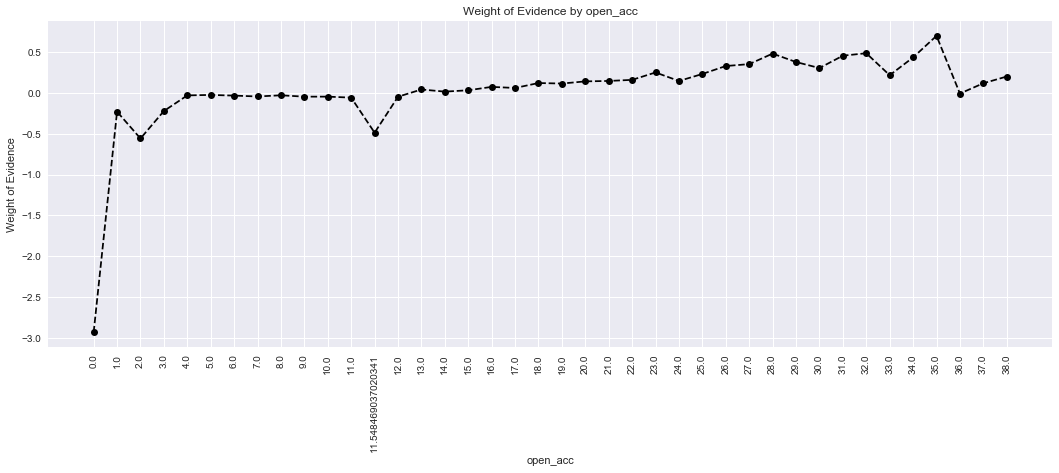

In [316]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [317]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [318]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\pandas\core\algorithms.py:1820: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.000000,751572,0.932136,0.846957,700567.0,51005.0,0.845524,0.867152,-0.025258,NaN,NaN,inf
1,0.195307,29,0.896552,0.000033,26.0,3.0,0.000031,0.000051,-0.485740,0.035584,0.460482,inf
2,1.000000,113266,0.940159,0.127641,106488.0,6778.0,0.128522,0.115235,0.109126,0.043607,0.594866,inf
3,2.000000,14854,0.952336,0.016739,14146.0,708.0,0.017073,0.012037,0.349519,0.012178,0.240393,inf
4,3.000000,4487,0.956987,0.005056,4294.0,193.0,0.005182,0.003281,0.457059,0.004651,0.107541,inf
5,4.000000,1564,0.954604,0.001762,1493.0,71.0,0.001802,0.001207,0.400639,0.002383,0.056421,inf
6,5.000000,757,0.953765,0.000853,722.0,35.0,0.000871,0.000595,0.381453,0.000839,0.019186,inf
7,6.000000,385,0.963636,0.000434,371.0,14.0,0.000448,0.000238,0.631920,0.009872,0.250468,inf
8,7.000000,170,0.970588,0.000192,165.0,5.0,0.000199,0.000085,0.851283,0.006952,0.219363,inf
9,8.000000,113,0.991150,0.000127,112.0,1.0,0.000135,0.000017,2.073275,0.020562,1.221991,inf


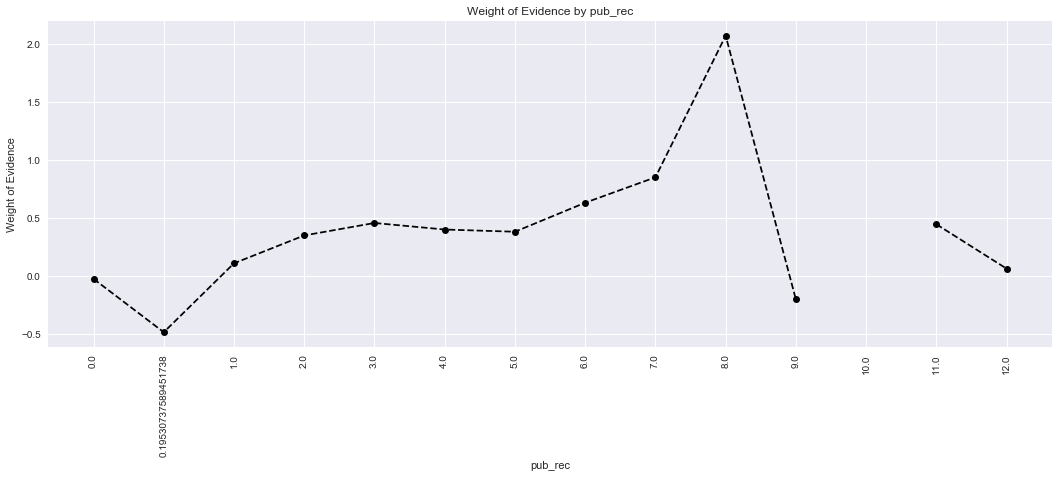

In [319]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [320]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [321]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\pandas\core\algorithms.py:1820: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(0.832, 4.36]",3428,0.890898,0.003863,3054.0,374.0,0.003686,0.006358,-0.545273,NaN,NaN,inf
1,"(4.36, 7.72]",20813,0.920002,0.023454,19148.0,1665.0,0.023110,0.028307,-0.202851,0.029103,0.342421,inf
2,"(7.72, 11.08]",64032,0.925834,0.072159,59283.0,4749.0,0.071549,0.080739,-0.120836,0.005832,0.082015,inf
3,"(11.08, 14.44]",73134,0.927270,0.082416,67815.0,5319.0,0.081847,0.090430,-0.099726,0.001437,0.021110,inf
4,"(14.44, 17.8]",87838,0.930076,0.098986,81696.0,6142.0,0.098600,0.104422,-0.057370,0.002805,0.042357,inf
5,"(17.8, 21.16]",126809,0.932402,0.142903,118237.0,8572.0,0.142702,0.145735,-0.021034,0.002326,0.036335,inf
6,"(21.16, 24.52]",94613,0.933741,0.106621,88344.0,6269.0,0.106624,0.106581,0.000397,0.001338,0.021431,inf
7,"(24.52, 27.88]",86392,0.935908,0.097356,80855.0,5537.0,0.097585,0.094136,0.035980,0.002168,0.035583,inf
8,"(27.88, 31.24]",96965,0.937802,0.109271,90934.0,6031.0,0.109749,0.102535,0.067997,0.001894,0.032017,inf
9,"(31.24, 34.6]",57944,0.937647,0.065298,54331.0,3613.0,0.065573,0.061426,0.065332,0.000156,0.002665,inf


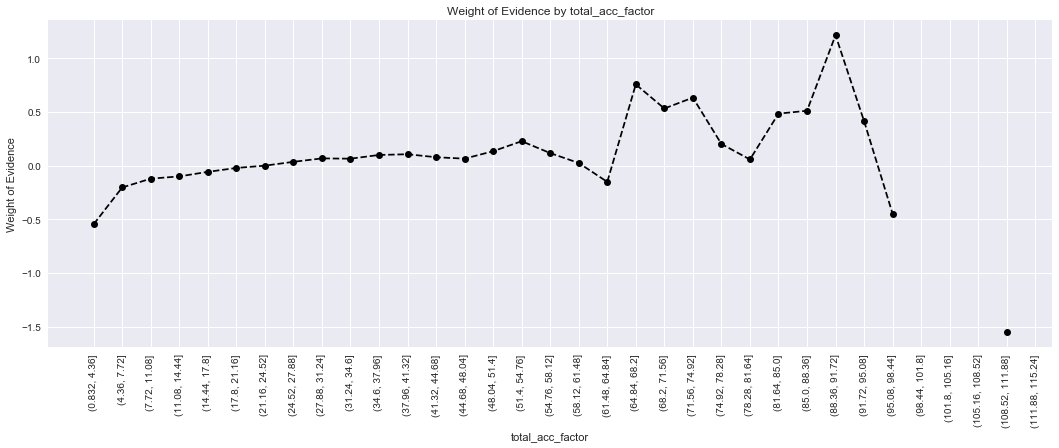

In [322]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [323]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [324]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\pandas\core\algorithms.py:1820: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.000000,883236,0.933701,0.995331,824678.0,58558.0,0.995315,0.995563,-0.000249,NaN,NaN,inf
1,0.004991,29,0.896552,0.000033,26.0,3.0,0.000031,0.000051,-0.485740,0.037149,0.485491,inf
2,1.000000,3866,0.938438,0.004357,3628.0,238.0,0.004379,0.004046,0.078942,0.041886,0.564682,inf
3,2.000000,208,0.923077,0.000234,192.0,16.0,0.000232,0.000272,-0.160318,0.015361,0.239259,inf
4,3.000000,28,0.928571,0.000032,26.0,2.0,0.000031,0.000034,-0.080275,0.005495,0.080043,inf
5,4.000000,7,0.857143,0.000008,6.0,1.0,0.000007,0.000017,-0.853465,0.071429,0.773190,inf
6,5.000000,3,0.666667,0.000003,2.0,1.0,0.000002,0.000017,-1.952077,0.190476,1.098612,inf
7,6.000000,1,1.000000,0.000001,1.0,0.0,0.000001,0.000000,inf,0.333333,inf,inf
8,14.000000,1,1.000000,0.000001,1.0,0.0,0.000001,0.000000,inf,0.000000,NaN,inf


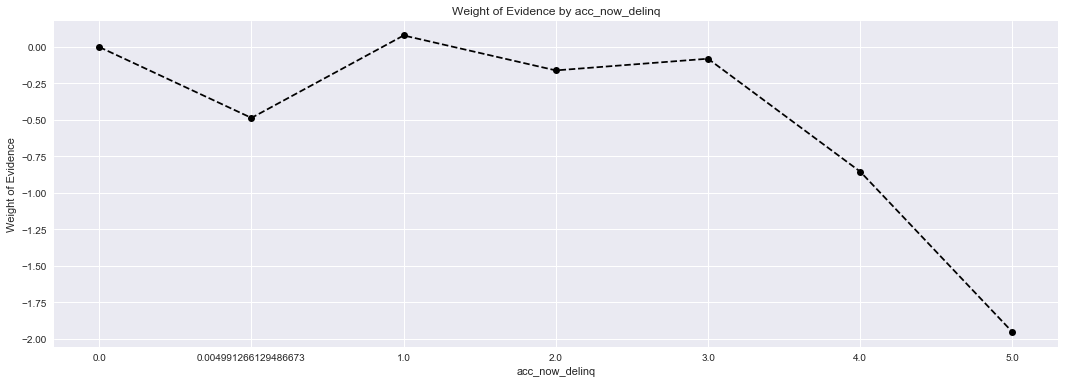

In [325]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [326]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [327]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Anaconda_Python\lib\site-packages\pandas\core\algorithms.py:1820: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",25512,0.924193,0.028750,23578.0,1934.0,0.028457,0.032881,-0.144501,NaN,NaN,inf
1,"(5000.0, 9999.999]",88052,0.927906,0.099227,81704.0,6348.0,0.098610,0.107924,-0.090261,0.003714,0.054239,inf
2,"(9999.999, 14999.998]",113959,0.931712,0.128422,106177.0,7782.0,0.128146,0.132304,-0.031930,0.003806,0.058331,inf
3,"(14999.998, 19999.998]",109737,0.933951,0.123664,102489.0,7248.0,0.123695,0.123225,0.003806,0.002239,0.035736,inf
4,"(19999.998, 24999.997]",92522,0.939139,0.104264,86891.0,5631.0,0.104870,0.095734,0.091143,0.005188,0.087338,inf
5,"(24999.997, 29999.997]",76044,0.939759,0.085695,71463.0,4581.0,0.086250,0.077883,0.102038,0.000620,0.010895,inf
6,"(29999.997, 34999.996]",130701,0.890031,0.147289,116328.0,14373.0,0.140398,0.244360,-0.554162,0.049727,0.656200,inf
7,"(34999.996, 39999.996]",48163,0.946058,0.054276,45565.0,2598.0,0.054993,0.044169,0.219174,0.056027,0.773336,inf
8,"(39999.996, 44999.996]",38593,0.950457,0.043491,36681.0,1912.0,0.044271,0.032507,0.308885,0.004399,0.089711,inf
9,"(44999.996, 49999.995]",30846,0.952279,0.034761,29374.0,1472.0,0.035452,0.025026,0.348264,0.001822,0.039379,inf


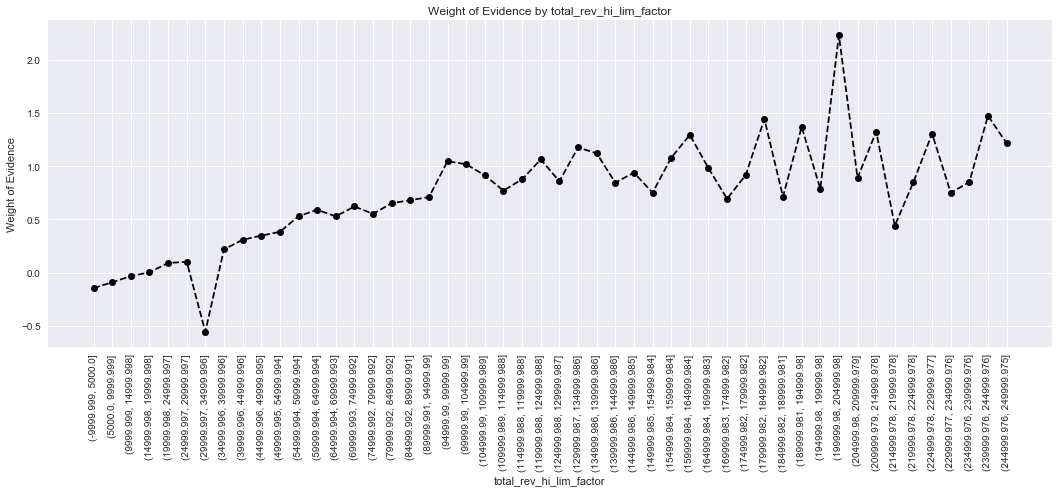

In [328]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [329]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [330]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.24, 44.266]",4224,0.936316,0.004760,3955.0,269.0,0.004773,0.004573,0.042800,NaN,NaN,0.021594
1,"(44.266, 72.862]",11134,0.934794,0.012547,10408.0,726.0,0.012562,0.012343,0.017556,0.001522,0.025244,0.021594
2,"(72.862, 101.457]",16346,0.932461,0.018421,15242.0,1104.0,0.018396,0.018769,-0.020109,0.002334,0.037665,0.021594
3,"(101.457, 130.053]",19814,0.929898,0.022329,18425.0,1389.0,0.022237,0.023615,-0.060100,0.002562,0.039990,0.021594
4,"(130.053, 158.649]",25736,0.937558,0.029002,24129.0,1607.0,0.029122,0.027321,0.063821,0.007660,0.123921,0.021594
5,"(158.649, 187.245]",39700,0.934912,0.044738,37116.0,2584.0,0.044796,0.043931,0.019485,0.002646,0.044336,0.021594
6,"(187.245, 215.841]",38965,0.939151,0.043910,36594.0,2371.0,0.044166,0.040310,0.091348,0.004239,0.071863,0.021594
7,"(215.841, 244.436]",38420,0.941723,0.043296,36181.0,2239.0,0.043667,0.038066,0.137280,0.002573,0.045932,0.021594
8,"(244.436, 273.032]",50987,0.941475,0.057458,48003.0,2984.0,0.057935,0.050732,0.132775,0.000248,0.004506,0.021594
9,"(273.032, 301.628]",46519,0.929319,0.052423,43231.0,3288.0,0.052176,0.055900,-0.068946,0.012156,0.201720,0.021594


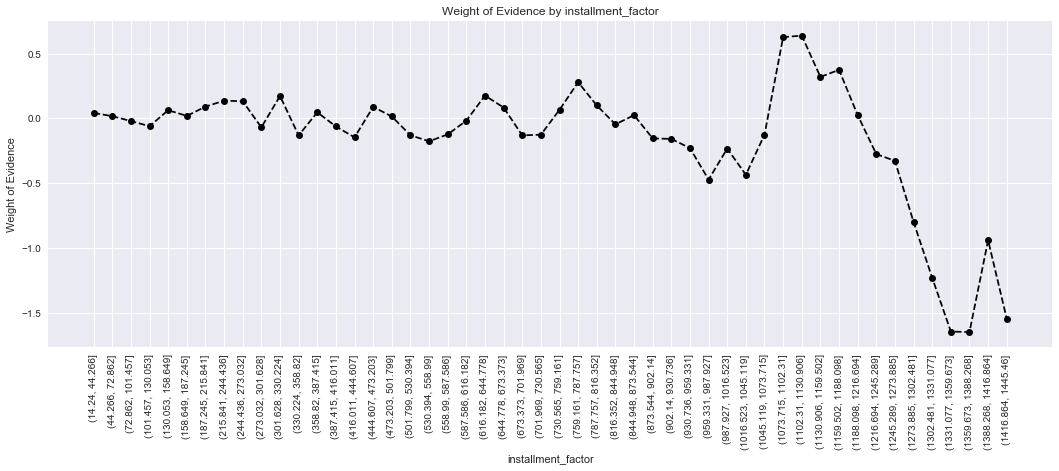

In [331]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [332]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\pandas\core\algorithms.py:1820: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9500.0, 190000.0]",865950,0.933063,0.975851,807986.0,57964.0,0.975169,0.985464,-0.010502,NaN,NaN,inf
1,"(190000.0, 380000.0]",18913,0.959234,0.021313,18142.0,771.0,0.021896,0.013108,0.513072,0.026171,0.523574,inf
2,"(380000.0, 570000.0]",1720,0.967442,0.001938,1664.0,56.0,0.002008,0.000952,0.746404,0.008207,0.233331,inf
3,"(570000.0, 760000.0]",444,0.963964,0.000500,428.0,16.0,0.000517,0.000272,0.641310,0.003478,0.105093,inf
4,"(760000.0, 950000.0]",149,0.946309,0.000168,141.0,8.0,0.000170,0.000136,0.224094,0.017655,0.417216,inf
5,"(950000.0, 1140000.0]",76,1.000000,0.000086,76.0,0.0,0.000092,0.000000,inf,0.053691,inf,inf
6,"(1140000.0, 1330000.0]",39,0.948718,0.000044,37.0,2.0,0.000045,0.000034,0.272546,0.051282,inf,inf
7,"(1330000.0, 1520000.0]",23,1.000000,0.000026,23.0,0.0,0.000028,0.000000,inf,0.051282,inf,inf
8,"(1520000.0, 1710000.0]",4,0.750000,0.000005,3.0,1.0,0.000004,0.000017,-1.546612,0.250000,inf,inf
9,"(1710000.0, 1900000.0]",7,1.000000,0.000008,7.0,0.0,0.000008,0.000000,inf,0.250000,inf,inf


In [333]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\pandas\core\algorithms.py:1820: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9500.0, 95000.0]",698262,0.928295,0.786881,648193.0,50069.0,0.782313,0.851239,-0.084438,NaN,NaN,inf
1,"(95000.0, 190000.0]",167688,0.952919,0.188970,159793.0,7895.0,0.192856,0.134225,0.362425,0.024624,0.446863,inf
2,"(190000.0, 285000.0]",15516,0.958752,0.017485,14876.0,640.0,0.017954,0.010881,0.500812,0.005834,0.138387,inf
3,"(285000.0, 380000.0]",3397,0.961437,0.003828,3266.0,131.0,0.003942,0.002227,0.570900,0.002684,0.070088,inf
4,"(380000.0, 475000.0]",1172,0.967577,0.001321,1134.0,38.0,0.001369,0.000646,0.750696,0.006140,0.179796,inf
5,"(475000.0, 570000.0]",548,0.967153,0.000618,530.0,18.0,0.000640,0.000306,0.737281,0.000424,0.013415,inf
6,"(570000.0, 665000.0]",280,0.960714,0.000316,269.0,11.0,0.000325,0.000187,0.551592,0.006439,0.185689,inf
7,"(665000.0, 760000.0]",164,0.969512,0.000185,159.0,5.0,0.000192,0.000085,0.814242,0.008798,0.262650,inf
8,"(760000.0, 855000.0]",91,0.934066,0.000103,85.0,6.0,0.000103,0.000102,0.005667,0.035446,0.808575,inf
9,"(855000.0, 950000.0]",58,0.965517,0.000065,56.0,2.0,0.000068,0.000034,0.686980,0.031451,0.681313,inf


In [334]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [335]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-140.0, 2800.0]",6,0.833333,0.000007,5.0,1.0,0.000006,0.000018,-1.009864,NaN,NaN,0.051705
1,"(2800.0, 5600.0]",38,0.842105,0.000046,32.0,6.0,0.000041,0.000106,-0.945326,0.008772,0.064539,0.051705
2,"(5600.0, 8400.0]",154,0.896104,0.000186,138.0,16.0,0.000178,0.000284,-0.464637,0.053999,0.480689,0.051705
3,"(8400.0, 11200.0]",902,0.896896,0.001087,809.0,93.0,0.001046,0.001651,-0.456103,0.000792,0.008534,0.051705
4,"(11200.0, 14000.0]",1844,0.898048,0.002222,1656.0,188.0,0.002141,0.003337,-0.443584,0.001152,0.012519,0.051705
5,"(14000.0, 16800.0]",2985,0.902513,0.003598,2694.0,291.0,0.003483,0.005165,-0.393843,0.004465,0.049741,0.051705
6,"(16800.0, 19600.0]",4051,0.897803,0.004882,3637.0,414.0,0.004703,0.007348,-0.446254,0.004710,0.052411,0.051705
7,"(19600.0, 22400.0]",8146,0.904861,0.009818,7371.0,775.0,0.009531,0.013755,-0.366857,0.007058,0.079397,0.051705
8,"(22400.0, 25200.0]",14366,0.907977,0.017314,13044.0,1322.0,0.016866,0.023463,-0.330120,0.003116,0.036737,0.051705
9,"(25200.0, 28000.0]",12856,0.908759,0.015494,11683.0,1173.0,0.015107,0.020819,-0.320732,0.000781,0.009388,0.051705


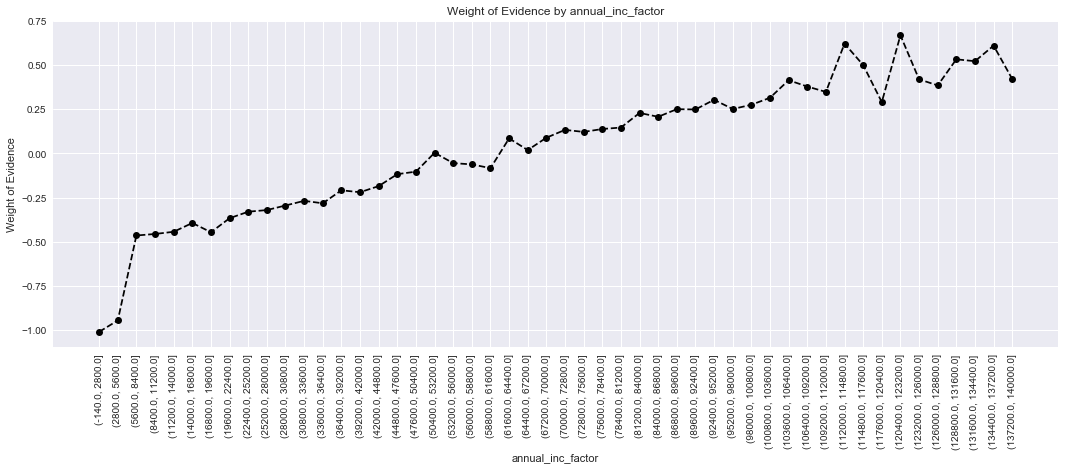

In [336]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [337]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [338]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\pandas\core\algorithms.py:1820: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",13886,0.924744,0.015648,12841.0,1045.0,0.015498,0.017766,-0.136598,NaN,NaN,inf
1,"(3.76, 7.52]",29597,0.935568,0.033353,27690.0,1907.0,0.033419,0.032421,0.030316,0.010823,0.166914,inf
2,"(7.52, 11.28]",32986,0.935276,0.037172,30851.0,2135.0,0.037234,0.036298,0.025478,0.000292,0.004837,inf
3,"(11.28, 15.04]",32756,0.932898,0.036913,30558.0,2198.0,0.036881,0.037369,-0.013146,0.002378,0.038624,inf
4,"(15.04, 18.8]",22657,0.935737,0.025532,21201.0,1456.0,0.025588,0.024754,0.033131,0.002840,0.046277,inf
5,"(18.8, 22.56]",28873,0.938385,0.032537,27094.0,1779.0,0.032700,0.030245,0.078037,0.002648,0.044905,inf
6,"(22.56, 26.32]",27542,0.939837,0.031037,25885.0,1657.0,0.031241,0.028171,0.103431,0.001452,0.025394,inf
7,"(26.32, 30.08]",26638,0.939147,0.030019,25017.0,1621.0,0.030193,0.027559,0.091288,0.000690,0.012143,inf
8,"(30.08, 33.84]",18960,0.942774,0.021366,17875.0,1085.0,0.021574,0.018446,0.156599,0.003627,0.065311,inf
9,"(33.84, 37.6]",478702,0.931214,0.539456,445774.0,32928.0,0.538011,0.559819,-0.039736,0.011560,0.196334,inf


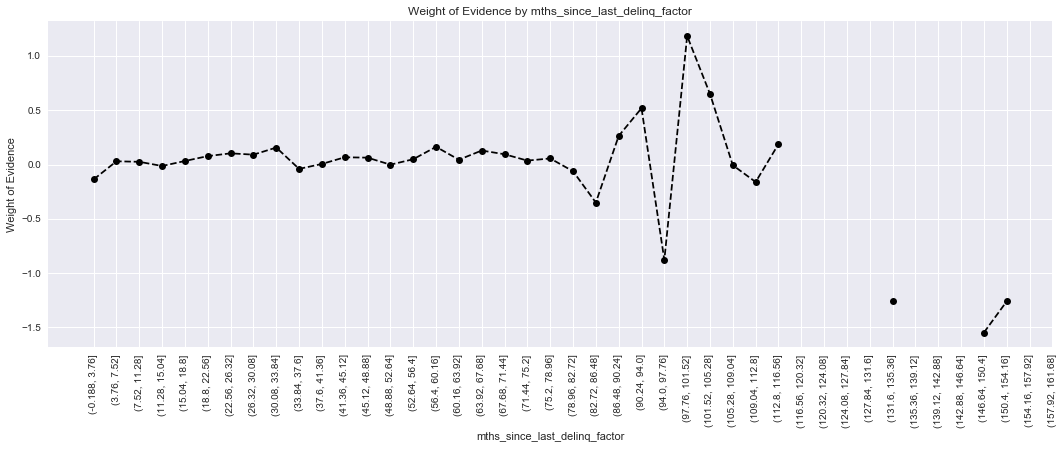

In [339]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [340]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3: Homework

In [341]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9.999, 99.99]",887368,0.933715,0.999988,828549.0,58819.0,0.999987,1.0,-0.000013,NaN,NaN,inf
1,"(99.99, 199.98]",6,1.000000,0.000007,6.0,0.0,0.000007,0.0,inf,0.066285,inf,inf
2,"(199.98, 299.97]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(299.97, 399.96]",1,1.000000,0.000001,1.0,0.0,0.000001,0.0,inf,NaN,NaN,inf
4,"(399.96, 499.95]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(499.95, 599.94]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(599.94, 699.93]",1,1.000000,0.000001,1.0,0.0,0.000001,0.0,inf,NaN,NaN,inf
7,"(699.93, 799.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(799.92, 899.91]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(899.91, 999.9]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


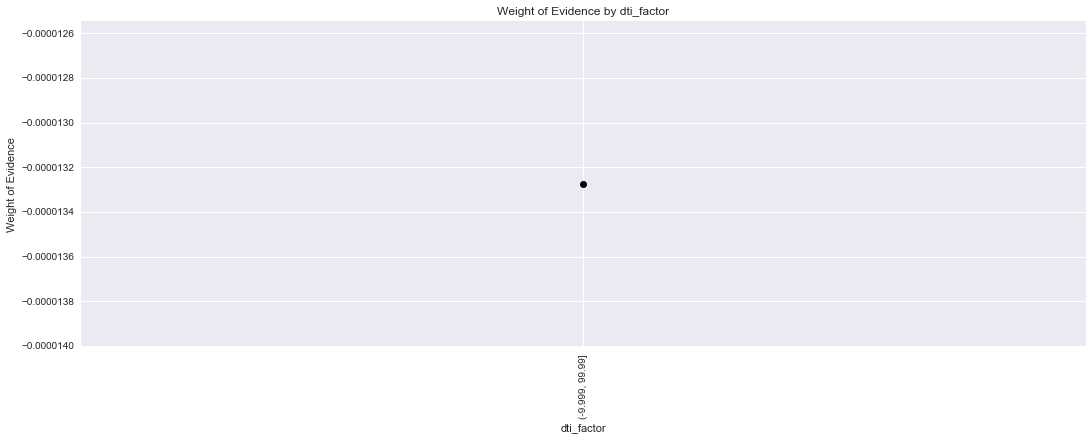

In [342]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [343]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [344]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",2401,0.918367,0.002770,2205.0,196.0,0.002726,0.003385,-0.216522,NaN,NaN,0.013203
1,"(0.7, 1.4]",3173,0.924047,0.003660,2932.0,241.0,0.003624,0.004162,-0.138247,0.005679,0.078275,0.013203
2,"(1.4, 2.1]",4118,0.937348,0.004750,3860.0,258.0,0.004772,0.004455,0.068573,0.013302,0.206820,0.013203
3,"(2.1, 2.8]",5341,0.941397,0.006161,5028.0,313.0,0.006215,0.005405,0.139684,0.004049,0.071112,0.013203
4,"(2.8, 3.5]",6819,0.938701,0.007866,6401.0,418.0,0.007913,0.007218,0.091838,0.002696,0.047846,0.013203
5,"(3.5, 4.2]",8156,0.941761,0.009409,7681.0,475.0,0.009495,0.008203,0.146300,0.003060,0.054462,0.013203
6,"(4.2, 4.9]",9698,0.944215,0.011187,9157.0,541.0,0.011320,0.009342,0.191964,0.002455,0.045664,0.013203
7,"(4.9, 5.6]",11627,0.944010,0.013413,10976.0,651.0,0.013568,0.011242,0.188066,0.000206,0.003898,0.013203
8,"(5.6, 6.3]",13018,0.944308,0.015017,12293.0,725.0,0.015196,0.012520,0.193723,0.000298,0.005657,0.013203
9,"(6.3, 7.0]",14305,0.945823,0.016502,13530.0,775.0,0.016725,0.013383,0.222911,0.001515,0.029188,0.013203


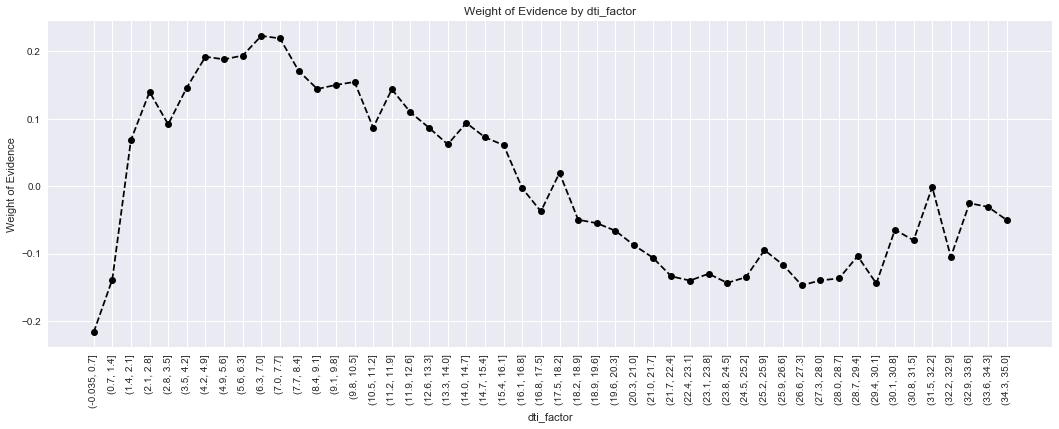

In [345]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [346]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [347]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",1417,0.772759,0.001597,1095.0,322.0,0.001322,0.005474,-1.421266,NaN,NaN,inf
1,"(2.58, 5.16]",424,0.948113,0.000478,402.0,22.0,0.000485,0.000374,0.260185,0.175354,1.681452,inf
2,"(5.16, 7.74]",395,0.949367,0.000445,375.0,20.0,0.000453,0.000340,0.285969,0.001254,0.025784,inf
3,"(7.74, 10.32]",754,0.952255,0.000850,718.0,36.0,0.000867,0.000612,0.347726,0.002888,0.061757,inf
4,"(10.32, 12.9]",630,0.939683,0.000710,592.0,38.0,0.000714,0.000646,0.100696,0.012572,0.247030,inf
5,"(12.9, 15.48]",987,0.955420,0.001112,943.0,44.0,0.001138,0.000748,0.419652,0.015738,0.318956,inf
6,"(15.48, 18.06]",1076,0.954461,0.001213,1027.0,49.0,0.001239,0.000833,0.397353,0.000959,0.022300,inf
7,"(18.06, 20.64]",817,0.963280,0.000921,787.0,30.0,0.000950,0.000510,0.621807,0.008819,0.224454,inf
8,"(20.64, 23.22]",1360,0.951471,0.001533,1294.0,66.0,0.001562,0.001122,0.330614,0.011810,0.291192,inf
9,"(23.22, 25.8]",1003,0.949153,0.001130,952.0,51.0,0.001149,0.000867,0.281515,0.002318,0.049099,inf


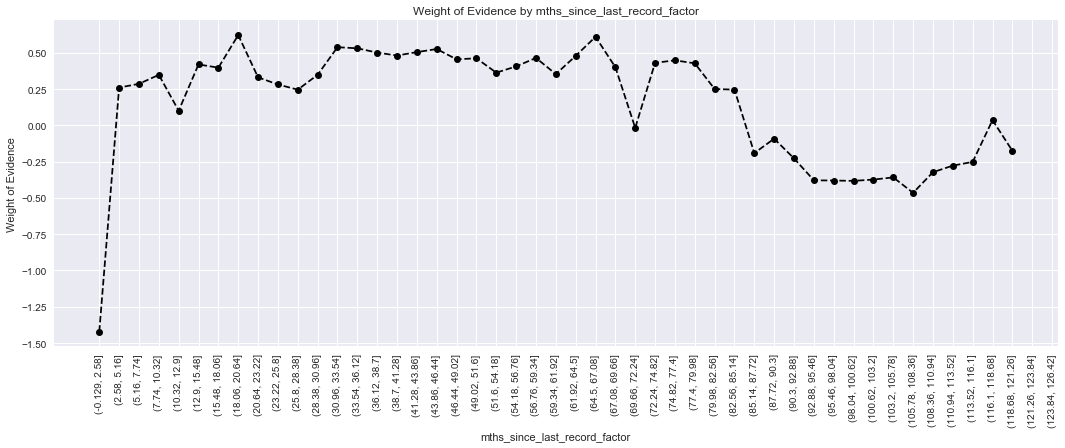

In [348]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [349]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

In [352]:
df_inputs_prepr.isnull().sum()

id                                                                 0
member_id                                                          0
loan_amnt                                                          0
funded_amnt                                                        0
funded_amnt_inv                                                    0
term                                                               0
int_rate                                                           0
installment                                                        0
grade                                                              0
sub_grade                                                          0
home_ownership                                                     0
annual_inc                                                         0
verification_status                                                0
issue_d                                                            0
loan_status                       

Preprocessing the Test Dataset

In [353]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(df_inputs_prepr, loan_data1['good_bad'], test_size = 0.2, random_state = 42)
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# This time we set the size of the test dataset to be 20%.
# Respectively, the size of the train dataset becomes 80%.
# We also set a specific random state.
# This would allow us to perform the exact same split multimple times.
# This means, to assign the exact same observations to the train and test datasets.

In [357]:
loan_data_inputs_train.isnull().sum()

id                                                                 0
member_id                                                          0
loan_amnt                                                          0
funded_amnt                                                        0
funded_amnt_inv                                                    0
term                                                               0
int_rate                                                           0
installment                                                        0
grade                                                              0
sub_grade                                                          0
home_ownership                                                     0
annual_inc                                                         0
verification_status                                                0
issue_d                                                            0
loan_status                       

In [246]:
#####
#loan_data_inputs_train = df_inputs_prepr
#####
loan_data_inputs_test = df_inputs_prepr

In [ ]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')

### Selecting the Features

In [363]:
loan_data_inputs_train.isnull().sum()

id                                                                 0
member_id                                                          0
loan_amnt                                                          0
funded_amnt                                                        0
funded_amnt_inv                                                    0
term                                                               0
int_rate                                                           0
installment                                                        0
grade                                                              0
sub_grade                                                          0
home_ownership                                                     0
annual_inc                                                         0
verification_status                                                0
issue_d                                                            0
loan_status                       

In [378]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [457]:
inputs_train_with_ref_cat.isnull().sum()

grade:A                                         0
grade:B                                         0
grade:C                                         0
grade:D                                         0
grade:E                                         0
grade:F                                         0
grade:G                                         0
home_ownership:RENT_OTHER_NONE_ANY              0
home_ownership:OWN                              0
home_ownership:MORTGAGE                         0
addr_state:ND_NE_IA_NV_FL_HI_AL                 0
addr_state:NM_VA                                0
addr_state:NY                                   0
addr_state:OK_TN_MO_LA_MD_NC                    0
addr_state:CA                                   0
addr_state:UT_KY_AZ_NJ                          0
addr_state:AR_MI_PA_OH_MN                       0
addr_state:RI_MA_DE_SD_IN                       0
addr_state:GA_WA_OR                             0
addr_state:WI_MT                                0


In [398]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
#'mths_since_issue_d:>84',
'int_rate:>20.281',
#'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_record:Missing']

In [399]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categor


In [400]:
inputs_train.shape

(709903, 92)

In [401]:
# PD Model Estimation

## Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

reg = LogisticRegression()
# We create an instance of an object from the 'LogisticRegression' class.

pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

#rfe = RFE(reg, 20)
#rfe = rfe.fit(inputs_train, loan_data_targets_train.values.ravel())
#print(rfe.support_)
#print(rfe.ranking_)

reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-0.017566
1,grade:A,-1.157800
2,grade:B,-0.596603
3,grade:C,-0.201422
4,grade:D,-0.022817
5,grade:E,0.159381
6,grade:F,0.200189
7,home_ownership:OWN,0.151823
8,home_ownership:MORTGAGE,0.125740
9,addr_state:NM_VA,-0.001256


## Build a Logistic Regression Model with P-Values

In [402]:
import statsmodels.api as sm
logit_model=sm.Logit(loan_data_targets_train,inputs_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.221754
         Iterations 8
                                        Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.090      
Dependent Variable:            good_bad                  AIC:                       315029.9675
Date:                          2020-07-04 17:50          BIC:                       316073.9999
No. Observations:              709903                    Log-Likelihood:            -1.5742e+05
Df Model:                      90                        LL-Null:                   -1.7305e+05
Df Residuals:                  709812                    LLR p-value:               0.0000     
Converged:                     1.0000                    Scale:                     1.0000     
No. Iterations:                8.0000                                                          
---------------------------------------------------------------------------

In [410]:
inputs_train_final=inputs_train.drop(['grade:D',
'grade:E',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:RI_MA_DE_SD_IN',
'term:36',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:>=5',
'total_acc:>=52',
'acc_now_delinq:>=1',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
],axis=1)
           

In [411]:
# PD Model Estimation

## Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

reg = LogisticRegression()
# We create an instance of an object from the 'LogisticRegression' class.

pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

reg.fit(inputs_train_final, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

#rfe = RFE(reg, 20)
#rfe = rfe.fit(inputs_train, loan_data_targets_train.values.ravel())
#print(rfe.support_)
#print(rfe.ranking_)

reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

feature_name = inputs_train_final.columns.values
# Stores the names of the columns of a dataframe in a variable.

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,0.126760
1,grade:A,-1.164157
2,grade:B,-0.597952
3,grade:C,-0.205331
4,grade:F,0.076290
5,home_ownership:OWN,0.149112
6,home_ownership:MORTGAGE,0.130777
7,addr_state:AR_MI_PA_OH_MN,0.098123
8,addr_state:GA_WA_OR,0.133168
9,addr_state:WI_MT,0.183584


In [412]:
# Here we select a limited set of input variables in a new dataframe.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [413]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
#'mths_since_issue_d:>84',
'int_rate:>20.281',
#'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_record:Missing']

In [414]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
550946,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
292628,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
739899,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
302859,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
653323,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [418]:
inputs_test_final=inputs_test.drop(['grade:D',
'grade:E',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:RI_MA_DE_SD_IN',
'term:36',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:>=5',
'total_acc:>=52',
'acc_now_delinq:>=1',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
],axis=1)

In [420]:
y_hat_test = reg.predict(inputs_test_final)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [421]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 1, 1, ..., 1, 1, 1])

In [423]:
y_hat_test_proba = reg.predict_proba(inputs_test_final)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [424]:
y_hat_test_proba
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.09086875, 0.90913125],
       [0.02505879, 0.97494121],
       [0.01114486, 0.98885514],
       ...,
       [0.06767004, 0.93232996],
       [0.02977565, 0.97022435],
       [0.07342683, 0.92657317]])

In [425]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([0.90913125, 0.97494121, 0.98885514, ..., 0.93232996, 0.97022435,
       0.92657317])

In [426]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [427]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.90913125, 0.97494121, 0.98885514, ..., 0.93232996, 0.97022435,
       0.92657317])

In [428]:
loan_data_targets_test_temp = loan_data_targets_test

In [429]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [430]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [431]:
df_actual_predicted_probs.shape

(177476, 2)

In [432]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [433]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [434]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
550946,1,0.909131
292628,1,0.974941
739899,1,0.988855
302859,1,0.918416
653323,1,0.911860


# Accuracy and Area under the Curve

In [435]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [436]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,5581,6225
1,31934,133736


In [437]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.031447,0.035075
1,0.179934,0.753544


In [438]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.7849906466226418

In [439]:
from sklearn.metrics import roc_curve, roc_auc_score

0.7270805155981337

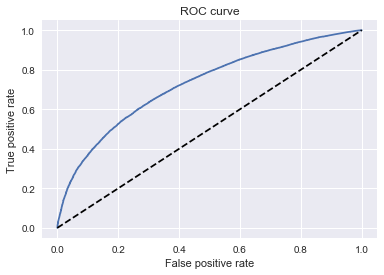

In [440]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

### Gini and Kolmogorov-Smirnov

In [442]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [443]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,40666,0,0.363307,0,1,0,1,0.000006,0.000000,0.000085
1,40755,1,0.438341,0,2,1,1,0.000011,0.000006,0.000085
2,40781,1,0.439866,0,3,2,1,0.000017,0.000012,0.000085
3,41048,1,0.458449,0,4,3,1,0.000023,0.000018,0.000085
4,42398,0,0.472738,0,5,3,2,0.000028,0.000018,0.000169


In [444]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
177471,852140,0,0.997237,1,177472,165666,11806,0.999977,0.999976,1.0
177472,469768,1,0.997285,1,177473,165667,11806,0.999983,0.999982,1.0
177473,630544,1,0.997383,1,177474,165668,11806,0.999989,0.999988,1.0
177474,790216,1,0.997523,1,177475,165669,11806,0.999994,0.999994,1.0
177475,772161,1,0.997749,1,177476,165670,11806,1.000000,1.000000,1.0


In [445]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [446]:
df_actual_predicted_probs.head()

,level_0,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,0,40666,0,0.363307,0,1,0,1,0.000006,0.000000,0.000085
1,1,40755,1,0.438341,0,2,1,1,0.000011,0.000006,0.000085
2,2,40781,1,0.439866,0,3,2,1,0.000017,0.000012,0.000085
3,3,41048,1,0.458449,0,4,3,1,0.000023,0.000018,0.000085
4,4,42398,0,0.472738,0,5,3,2,0.000028,0.000018,0.000169


In [447]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [448]:
df_actual_predicted_probs.head()

,level_0,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,0,40666,0,0.363307,0,1,0,1,0.000006,0.000000,0.000085
1,1,40755,1,0.438341,0,2,1,1,0.000011,0.000006,0.000085
2,2,40781,1,0.439866,0,3,2,1,0.000017,0.000012,0.000085
3,3,41048,1,0.458449,0,4,3,1,0.000023,0.000018,0.000085
4,4,42398,0,0.472738,0,5,3,2,0.000028,0.000018,0.000169


In [449]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [450]:
df_actual_predicted_probs.head()

,level_0,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,0,40666,0,0.363307,0,1,0,1,0.000006,0.000000,0.000085
1,1,40755,1,0.438341,0,2,1,1,0.000011,0.000006,0.000085
2,2,40781,1,0.439866,0,3,2,1,0.000017,0.000012,0.000085
3,3,41048,1,0.458449,0,4,3,1,0.000023,0.000018,0.000085
4,4,42398,0,0.472738,0,5,3,2,0.000028,0.000018,0.000169


In [451]:
df_actual_predicted_probs.tail()

,level_0,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
177471,177471,852140,0,0.997237,1,177472,165666,11806,0.999977,0.999976,1.0
177472,177472,469768,1,0.997285,1,177473,165667,11806,0.999983,0.999982,1.0
177473,177473,630544,1,0.997383,1,177474,165668,11806,0.999989,0.999988,1.0
177474,177474,790216,1,0.997523,1,177475,165669,11806,0.999994,0.999994,1.0
177475,177475,772161,1,0.997749,1,177476,165670,11806,1.000000,1.000000,1.0


Text(0.5,1,'Gini')

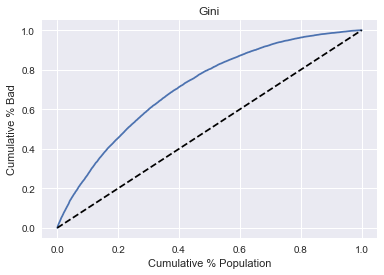

In [452]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [453]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.4541610311962674

Text(0.5,1,'Kolmogorov-Smirnov')

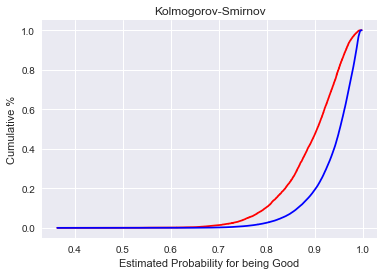

In [454]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [455]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.33559996691446425